This is the main Directory which installs Object Detection API and Does Everything like training,postprocessing...

**Install wget**: Used to download files

In [1]:
!pip install wget          

  Using cached wget-3.2.zip (10 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=f208f98a0292b46a6d8d0eeffa454ff53f09052a4f763f33547eea163d72ec60
  Stored in directory: c:\users\gopu\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [2]:
import os
import wget  # Used for Downloading Stuff. We will use it to download our Model

In [17]:
MODEL_NAME = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"   # This is the Mobile net 320x320 coco model that we will use
TF_RECORD_SCRIPT_NAME = 'tfrecord.py'   #The tfrecord file which will contains our train data
LABEL_MAP_NAME = 'label_map.pbtxt'               # Mapping of the labels dont worry we will see this in a bit..
MODEL_URL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

# Lets Downlad the TF Model Pretrained Model from Tensorflow Model Zoo and Install tensorflow Object Detection API

In [3]:
paths = {
    'MODEL_PATH': os.path.join('Workspace','Models'),
    'PROTOC_PATH': os.path.join('Workspace','protoc'),
    'PRETRAIN_MODEL': os.path.join('Workspace','Pretrained'),
    'SCRIPTS_PATH': os.path.join('Workspace','Scripts'),
    'ANNOTATION_PATH': os.path.join('Workspace','Annotations'),
    'CHECKPOINT_PATH': os.path.join('Workspace','My_Model',MODEL_NAME), 
    'IMAGE_PATH' : os.path.join('Workspace','Images'),
    'MUSIK_PATH' : os.path.join('Workspace','Musik')
}

In [18]:
files = {
    'PIPELINE_CONFIG':os.path.join('Workspace','My_Model', MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        elif os.name == 'nt':
            !mkdir {path}

Cloning the entire Repository we will use object detection api from tensorflow zoo garden

In [7]:
if not os.path.exists(os.path.join(paths['MODEL_PATH'],'research','object_detection')):
    !git clone "https://github.com/tensorflow/models" {paths['MODEL_PATH']}  

Protocol Buffer are used for serializing structured data. Its similar to json file. In Object detection api. They provides too many protoc files so we need to first compile them using protoc buffer which will generate .py file for every protoc file which we will install. It will install and setup everything for importing object_detection library

In [8]:
# Now lets install Object detection API. But the problem is it uses Protocol Buffers so we need to make sure that we have got 
# that installed.
# https://github.com/protocolbuffers/protobuf  ===> We cant install protobuf compiler using pip so we will use the official Repository
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}  
# Moving the zip file in corresponding dir.
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip   
# Unzipping
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin')) 
# Adding the bin dir to environment variable so that we can use protoc command
!cd Workspace/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
# above command will compile all protoc file and serialize them i.e. convert it to .py file and we store it in same dir. Rest 
# is self understood i.e. copying the setup.py file to research directory
!cd Workspace/models/research/slim && pip install -e .



 52% [.......................................                                   ]  778240 / 1468733

100% [..........................................................................] 1468733 / 1468733

        1 Datei(en) verschoben.
        1 Datei(en) kopiert.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying obje

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
c:\users\gopu\appdata\local\temp\easy_install-9iegxavi\pycocotools-2.0.2\.eggs\cython-0.29.23-py3.8-win-amd64.egg\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Gopu\AppData\Local\Temp\easy_install-9iegxavi\pycocotools-2.0.2\pycocotools\_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-38: module references __file__
error: [WinError 5] Zugriff verweigert: 'C:\\Users\\Gopu\\AppData\\Local\\Temp\\easy_install-9iegxavi\\pycocotools-2.0.2\\.eggs\\Cyt


copying object_detection\protos\grid_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\hyperparams_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\image_resizer_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\input_reader_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\keypoint_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\losses_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\mean_stddev_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\model_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\multiscale_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\optimizer_pb2.py -> build\lib\object_detection\protos
co

Searching for pandas
Reading https://pypi.org/simple/pandas/
Best match: pandas 1.2.4
Processing pandas-1.2.4-cp38-cp38-win_amd64.whl
Installing pandas-1.2.4-cp38-cp38-win_amd64.whl to c:\users\gopu\anaconda3\envs\moodplayer\lib\site-packages
Adding pandas 1.2.4 to easy-install.pth file

Installed c:\users\gopu\anaconda3\envs\moodplayer\lib\site-packages\pandas-1.2.4-py3.8-win-amd64.egg
Searching for scipy
Reading https://pypi.org/simple/scipy/
Best match: scipy 1.6.3
Processing scipy-1.6.3-cp38-cp38-win_amd64.whl
Installing scipy-1.6.3-cp38-cp38-win_amd64.whl to c:\users\gopu\anaconda3\envs\moodplayer\lib\site-packages
Adding scipy 1.6.3 to easy-install.pth file

Installed c:\users\gopu\anaconda3\envs\moodplayer\lib\site-packages\scipy-1.6.3-py3.8-win-amd64.egg
Searching for lvis
Reading https://pypi.org/simple/lvis/
Best match: lvis 0.5.3
Processing lvis-0.5.3-py3-none-any.whl
Installing lvis-0.5.3-py3-none-any.whl to c:\users\gopu\anaconda3\envs\moodplayer\lib\site-packages
Adding l

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installe

Note while executing Verification Script you might find some packages missing. So just write in next cell !pip install {PACKAGE}. You can Google it for the package to get right command :P

In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['MODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


9412608/9406464 [==============================] - 2s 0us/step


2021-06-03 10:56:41.174590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-03 10:56:41.189365: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.8.5: C:\Users\Gopu\anaconda3\envs\MoodPlayer\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-03 10:56:50.851320: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-06-03 10:56:51.647751: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 920M computeCapability: 3.5
coreClock: 0.954GHz coreCount: 2 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 13.41GiB/s
2021-06-03 10:56:51.649039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could n

I0603 10:58:26.633350  9816 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 8
I0603 10:58:26.636341  9816 efficientnet_model.py:147] round_filter input=32 output=64
I0603 10:58:26.680225  9816 efficientnet_model.py:147] round_filter input=32 output=64
I0603 10:58:26.680225  9816 efficientnet_model.py:147] round_filter input=16 output=32
I0603 10:58:27.753907  9816 efficientnet_model.py:147] round_filter input=16 output=32
I0603 10:58:27.753907  9816 efficientnet_model.py:147] round_filter input=24 output=48
I0603 10:58:30.002039  9816 efficientnet_model.py:147] round_filter input=24 output=48
I0603 10:58:30.003033  9816 efficientnet_model.py:147] round_filter input=40 output=80
I0603 10:58:31.779253  9816 efficientnet_model.py:147] round_filter input=40 output=80
I0603 10:58:31.780250  9816 efficientnet_model.py:147] round_filter input=80 output=160
I0603 10:58:33.371417  9816 efficientnet_model.py:147] round_filter input=80 output=160
I0603 10:58:33

In [13]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing c:\users\gopu\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached protobuf-3.17.2-py2.py3-none-any.whl (173 kB)
Processing c:\users\gopu\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-cp38-cp38-win_amd64.whl

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-of

In [10]:
!pip install pyyaml

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires matplotlib, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires Pillow, which is not installed.
tf-models-official 2.5.0 r

In [11]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, whic

In [17]:
!conda list

# packages in environment at C:\Users\Gopu\anaconda3\envs\MoodPlayer:
#
# Name                    Version                   Build  Channel
absl-py                   0.12.0                   pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
backcall                  0.2.0                      py_0    anaconda
ca-certificates           2020.10.14                    0    anaconda
cachetools                4.2.2                    pypi_0    pypi
certifi                   2020.6.20                py38_0    anaconda
chardet                   4.0.0                    pypi_0    pypi
colorama                  0.4.4                      py_0    anaconda
cycler                    0.10.0                   pypi_0    pypi
decorator                 4.4.2                      py_0    anaconda
flatbuffers               1.12                     pypi_0    pypi
gast                      0.4.0                    pypi_0    pypi
google-auth               1.30.1                 

In [5]:
import object_detection

Now Lets Download the Pretrained Model and move it to the Desired Directory

In [6]:
if os.name =='posix':
    !wget {MODEL_URL}
    !mv {MODEL_NAME+'.tar.gz'} {paths['PRETRAIN_MODEL']}
    !cd {paths['PRETRAIN_MODEL']} && tar -zxvf {MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(MODEL_URL)
    !move {MODEL_NAME+'.tar.gz'} {paths['PRETRAIN_MODEL']}
    !cd {paths['PRETRAIN_MODEL']} && tar -zxvf {MODEL_NAME+'.tar.gz'}

  5% [...                                                                     ]  1122304 / 20515344

 10% [.......                                                                 ]  2121728 / 20515344

 16% [............                                                            ]  3432448 / 20515344

 22% [................                                                        ]  4653056 / 20515344

 29% [.....................                                                   ]  6045696 / 20515344

 36% [.........................                                               ]  7397376 / 20515344

 43% [...............................                                         ]  8912896 / 20515344

 49% [...................................                                     ] 10067968 / 20515344

 55% [.......................................                                 ] 11395072 / 20515344

 61% [............................................                            ] 12705792 / 20515344

 67% [................................................                        ] 13787136 / 20515344

 73% [....................................................                    ] 14999552 / 20515344

 78% [........................................................                ] 16187392 / 20515344

 84% [.............................................................           ] 17416192 / 20515344

 91% [..................................................................      ] 18833408 / 20515344

 96% [.....................................................................   ] 19824640 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 Datei(en) verschoben.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


Creating the Label Map

In [7]:
labels = [{'name':'Angry', 'id':1}, {'name':'Crazy', 'id':2}, {'name':'Happy', 'id':3}, {'name':'Sad', 'id':4},
         {'name':'Shocked', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

Now we need to conver our train data and test data to tfrecord format. I am using the file from my Github repo. I wrote this file by taking reference from Nick. The file which automatically generates the TF-Record for our data.

In [15]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/Gnopal1132/Generate_TFRecord.git {paths['SCRIPTS_PATH']}

Cloning into 'Workspace\Scripts'...


In [19]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Workspace\Annotations\train.record
Successfully created the TFRecord file: Workspace\Annotations\test.record


In [20]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 Datei(en) kopiert.


Configuration file consist of all the info about our dataset. Like number of classes,Labels etc

In [21]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [22]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [23]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

Modifying the Pipeline Config File according to our dataset

In [24]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [25]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [26]:
TRAINING_SCRIPT = os.path.join(paths['MODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [28]:
print(command)

python Workspace\Models\research\object_detection\model_main_tf2.py --model_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --num_train_steps=2000


# Evaluate the Model

In [29]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [30]:
print(command)

python Workspace\Models\research\object_detection\model_main_tf2.py --model_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --checkpoint_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


In [31]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [32]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [33]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
category_index

{1: {'id': 1, 'name': 'Angry'},
 2: {'id': 2, 'name': 'Crazy'},
 3: {'id': 3, 'name': 'Happy'},
 4: {'id': 4, 'name': 'Sad'},
 5: {'id': 5, 'name': 'Shocked'}}

In [36]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Crazya0b2a346-b178-11eb-845e-5800e32a06be.jpg')

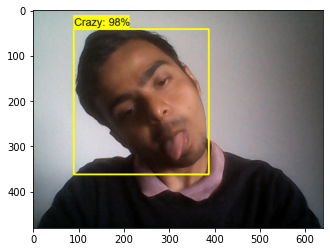

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))

detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}


detections['num_detections'] = num_detections


# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)


plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
!pip uninstall opencv-python-headless -y

In [ ]:
# Without Mood Player

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [39]:
!pip install pygame

In [ ]:
import numpy as np
from pygame import mixer

Note you must place your songs first in the respective directories under Music. After every categories contains songs. It will randomly play by your mood

In [ ]:
# With Mood Player

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
Previous_class = None

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    Class_value = detections['detection_classes'][0]+label_id_offset
    
    # Playing the Music
    if Previous_class != Class_value:  
        mixer.music.stop()
        Previous_class = Class_value
        mixer.init()
        Class_Name = category_index[Class_value]["name"]
        Music = os.path.join(paths['MUSIK_PATH'],str(Class_Name))
        Music_Nummer = np.random.randint(0,len(os.listdir(Music)))
        mixer.music.load(os.path.join(os.path.abspath(Music),os.listdir(Music)[Music_Nummer]))
        mixer.music.play()
        
    if cv2.waitKey(10) & 0xFF == ord('p'):
        mixer.music.pause()
    
    if cv2.waitKey(10) & 0xFF == ord('r'):
        mixer.music.unpause()
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break